<a href="https://colab.research.google.com/github/guidohc98/mi_repositorio/blob/master/notebook_tarea1_hertzrikencatena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUNTO 1

In [83]:
import requests
import pandas as pd
from datetime import datetime
from tqdm import tqdm
from IPython.display import display

In [84]:
def consultar_variables_bcra(fecha_inicio, fecha_fin):

    #Guardo todas las variables disponibles
    response = requests.get("https://api.bcra.gob.ar/estadisticas/v3.0/monetarias", verify=False)
    variables = response.json().get("results", [])
    print(f"Se encontraron {len(variables)} variables.")

    df_BCRA = pd.DataFrame()

    #Armo un bucle para agarrar el id de la variable y descripción
    for var in tqdm(variables, desc="Consultando variables"):
        var_id = var.get("idVariable")
        descripcion = var.get("descripcion")

        url = f"https://api.bcra.gob.ar/estadisticas/v3.0/monetarias/{var_id}"
        r = requests.get(url, verify=False)

        if r.status_code != 200:
            print(f"Error al consultar variable {var_id}")
            continue

        data = r.json().get("results", [])
        df_var = pd.DataFrame(data)

        if df_var.empty:
            continue

        #Convierto las fechas con datetime y filtro
        df_var["fecha"] = pd.to_datetime(df_var["fecha"])
        df_var = df_var[(df_var["fecha"] >= fecha_inicio) & (df_var["fecha"] <= fecha_fin)]

        if df_var.empty:
            continue

        #Agarro la descripción de la variable para renombrar columnas.
        df_var = df_var[["fecha", "valor"]].rename(columns={"valor": descripcion})
        df_var = df_var.set_index("fecha")

        #Merge con dataframe final
        df_BCRA = pd.merge(df_BCRA, df_var, how="outer", left_index=True, right_index=True)

    return df_BCRA.sort_index()



In [86]:
inicio = datetime(2025, 4, 10)
fin = datetime(2025, 4, 15)

df = consultar_variables_bcra(inicio, fin)
display(df)

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Se encontraron 189 variables.


Consultando variables:   0%|          | 0/189 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Consultando variables:   1%|          | 1/189 [00:01<03:38,  1.16s/it]/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Consultando variables:   1%|          | 2/189 [00:02<03:48,  1.22s/it]/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certifi

,Reservas Internacionales del BCRA (en millones de dólares - cifras provisorias sujetas a cambio de valuación),Tipo de Cambio Minorista ($ por USD) Comunicación B 9791 - Promedio vendedor,Tipo de Cambio Mayorista ($ por USD) Comunicación A 3500 - Referencia,Tasa de Política Monetaria (en % n.a.),BADLAR en pesos de bancos privados (en % n.a.),TM20 en pesos de bancos privados (en % n.a.),"Tasas de interés de las operaciones de pase activas para el BCRA, a 1 día de plazo (en % n.a.)",Tasas de interés por préstamos entre entidades financiera privadas (BAIBAR) (en % n.a.),Tasas de interés por depósitos a 30 días de plazo en entidades financieras (en % n.a.),Tasa de interés de préstamos por adelantos en cuenta corriente,...,"Saldo de LEBAC y NOBAC en Pesos, LEGAR y LEMIN (en millones de $)",Saldo de LEBAC y NOBAC en Pesos de Entidades Financieras (en millones de $),"Saldo de LEBAC en dólares, LEDIV y BOPREAL (en millones de USD)",Saldo de NOCOM (en millones de $),"Tasas de interés de política monetaria, TNA (en %)","Tasas de interés de política monetaria, TEA (en %)","Tasas de interés del BCRA para pases activos en pesos a 1 días, TNA (en %)","Tasas de interés del BCRA para pases activos en pesos a 7 días, TNA (en %)","Saldo de Letras Fiscales de Liquidez en cartera de entidades financieras, en valor técnico (en millones de $)",Saldo de M2 Transaccional del Sector Privado (expresado en millones de Pesos)
fecha,,,,,,,,,,,,,,,,,,,,,
2025-04-10,24773.0,1106.43,1077.38,29.0,32.0625,32.7500,33.0,33.81,30.60,38.49,...,238267.0491,0.0,10197.87,0.0,29.0,33.63,33.0,33.0,6.570625e+06,4.852140e+07
2025-04-11,24704.0,1107.96,1078.38,29.0,32.1250,32.9375,33.0,36.68,30.75,44.47,...,258959.7291,0.0,10230.88,0.0,29.0,33.63,33.0,33.0,3.668166e+06,4.827931e+07
2025-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-14,24221.0,1233.36,1182.42,29.0,36.2500,37.5000,33.0,47.51,34.02,53.91,...,279463.4800,0.0,10199.40,0.0,29.0,33.63,NaN,NaN,6.664155e+06,4.803242e+07
2025-04-15,36777.0,1233.99,1200.83,29.0,35.6250,36.0625,33.0,40.10,35.13,52.55,...,260439.1446,0.0,10226.49,0.0,29.0,33.63,NaN,NaN,6.808424e+06,4.809595e+07


Punto 2

A) No, pese a que el pib per cápita en principio es útil para la comparación rápida entre países respecto del tamaño de sus economías y su población, respecto de los ingresos deja de lado cuestiones relativas a la distribución. No necesariamente altos niveles de pib per cápita impliquen altos niveles de ingresos, por ello, el análisis debería complementarse con otros indicadores como el coeficiente de gini que si nos permite ahondar más sobre la desigualdad en un país o el índice de desarrollo humano, que aporta elementos sobre el ingreso indirecto como el acceso a la educación y salud.

In [87]:
!pip install world_bank_data --upgrade

import world_bank_data as wb

In [88]:
serie_id = "NY.GDP.PCAP.KD"
url_serie = f"https://api.worldbank.org/v2/country/all/indicator/{serie_id}?format=jsonstat&per_page=20000"

res = requests.get(url_serie)

df = pd.DataFrame(wb.get_series(serie_id)).reset_index().rename(columns={serie_id: "value"})

df.info()

countries = wb.get_countries()

countries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  17290 non-null  object 
 1   Series   17290 non-null  object 
 2   Year     17290 non-null  object 
 3   value    14008 non-null  float64
dtypes: float64(1), object(3)
memory usage: 540.4+ KB


,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN


In [89]:
#PUNTO B

df_mergeado = pd.merge(df, countries, how="inner", left_on="Country", right_on="name")

df_mergeado_1990 = df_mergeado[df_mergeado["Year"]=="1990"].sort_values(by="value", ascending=False).head(10).drop(["iso2Code", "region", "adminregion", "incomeLevel", "lendingType", "capitalCity", "longitude", "latitude" ], axis=1)
print(df_mergeado_1990)

df_mergeado_2010 = df_mergeado[df_mergeado["Year"]=="2010"].sort_values(by="value", ascending=False).head(10).drop(["iso2Code", "region", "adminregion", "incomeLevel", "lendingType", "capitalCity", "longitude", "latitude" ], axis=1)
print(df_mergeado_2010)

                    Country                              Series  Year  \
11535                Monaco  GDP per capita (constant 2015 US$)  1990   
4450                Bermuda  GDP per capita (constant 2015 US$)  1990   
15305           Switzerland  GDP per capita (constant 2015 US$)  1990   
16345  United Arab Emirates  GDP per capita (constant 2015 US$)  1990   
10625            Luxembourg  GDP per capita (constant 2015 US$)  1990   
12640                Norway  GDP per capita (constant 2015 US$)  1990   
4905      Brunei Darussalam  GDP per capita (constant 2015 US$)  1990   
13420                 Qatar  GDP per capita (constant 2015 US$)  1990   
6530                Denmark  GDP per capita (constant 2015 US$)  1990   
16475         United States  GDP per capita (constant 2015 US$)  1990   

               value                  name  
11535  105878.372767                Monaco  
4450    89089.734642               Bermuda  
15305   70063.851690           Switzerland  
16345   66979.15

In [90]:
#PUNTO C

df_mergeado_2000_2010 = df_mergeado[(df_mergeado["Year"] >= "2000") & (df_mergeado["Year"] <= "2010")].sort_values(["Country", "Year"])


In [91]:
#Variación porcentual año a año por país, agregando la columna "variacion"
df_mergeado_2000_2010["variacion"] = df_mergeado.groupby("Country")["value"].pct_change()

#Luego calculo el promedio de dichas variaciones
crecimiento_promedio = df_mergeado_2000_2010.groupby("Country")["variacion"].mean().reset_index()

#Paso a porcentaje
crecimiento_promedio["variacion"] = crecimiento_promedio["variacion"] * 100

#5 países con mayor crecimiento
print(crecimiento_promedio.sort_values(by="variacion", ascending=False).head(5))

#5 países con menor crecimiento
print(crecimiento_promedio.sort_values(by="variacion", ascending=True).head(5))

               Country  variacion
15          Azerbaijan  13.467456
69   Equatorial Guinea  12.303298
168            Myanmar  11.226616
46               China   9.721003
146   Macao SAR, China   8.762658
                      Country  variacion
180  Northern Mariana Islands  -4.568958
40             Cayman Islands  -4.558555
44            Channel Islands  -4.281175
263                  Zimbabwe  -3.871366
79              Faroe Islands  -2.568043


<ipython-input-91-f6ea8d60ceee>:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_mergeado_2000_2010["variacion"] = df_mergeado.groupby("Country")["value"].pct_change()


In [92]:
#PUNTO D

promedio_pbi_pc_region = (df_mergeado.groupby("region")["value"].mean().reset_index().rename(columns={"value": "pbi_pc_promedio"}))
print(promedio_pbi_pc_region.sort_values(by="pbi_pc_promedio", ascending=False).head(1))

          region  pbi_pc_promedio
5  North America     53595.043551


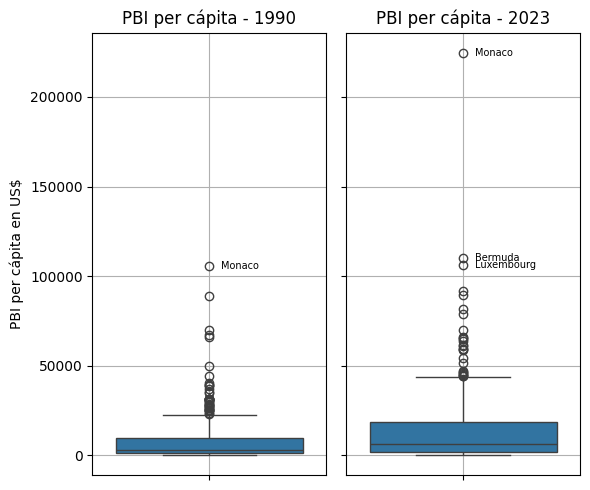

In [93]:
#PUNTO E

import matplotlib.pyplot as plt
import seaborn as sns

#Filtrar datos de los dos años
df_filtrado = df[df["Year"].isin(["1990", "2023"])]

fig, axes = plt.subplots(1, 2, figsize=(6, 5), sharey=True)

for i, year in enumerate(["1990", "2023"]):
    ax = axes[i]
    df_year = df_filtrado[df_filtrado["Year"] == year]

    sns.boxplot(y="value", data=df_year, ax=ax)
    ax.set_title(f"PBI per cápita - {year}")
    ax.set_ylabel("PBI per cápita en US$" if i == 0 else "")
    ax.grid(True)

    #Etiquetar outliers > 100.000 us$
    outliers = df_year[df_year["value"] > 100000]
    texts = []
    for _, row in outliers.iterrows():
        texts.append(ax.text(0.05, row["value"], row["Country"], fontsize=7, ha="left", va="center"))

plt.tight_layout()
plt.show()


Respecto de la tendencia central de los datos, se observa asimetría positiva en ambas distribuciones en tanto la mediana se acerca mas al Q1 que al Q3. En éste caso, observando el pib per cápita de los países, es normal que suceda dado que la mayoría de los países son de ingresos medios/bajos y son unos pocos elementos de la muestra que tiran el promedio hacia arriba por ello la mediana podría ser un mejor indicador de la tendencia central en lugar del promedio. En tanto la dispersión, la distancia entre la caja y el bigote superior nos indica, la mayor variabilidad en los países con altos pib per cápita. En comparación, podríamos resumir el análisis entre los gráficos como un aumento no solo de la dispersión central de los datos, es decir entre el Q1 y Q3 sino también del dato más alejado de la caja que representa los valores entre Q1 y Q3. Por último, respecto de los outliers arbitrariamente únicamente etiqueté los valores > a 100.000 us$ para que no se superporgan los textos. No corresponde quitarlos de la muestra en tanto son valores correctos en el análisis y se mantienen entre ambos gráficos dado que corresponden a países con poblaciones muy pequeñas respecto del resto de la muestra y que junto a su elevada actividad financiera podría explicar la diferencia en el pib per cápita respecto del resto de la muestra.